# Path Integral Control Example: Cart Pole

In [1]:
# If you run the code first time, run this
using Pkg
Pkg.instantiate()

## Load Packages 

In [2]:
using Plots; #gr(); pylot()
using LinearAlgebra
using LaTeXStrings
using BenchmarkTools
using Revise # autoreload for jupyter with Julia

## Load Julia Files

In [3]:
includet("../models/CartPole.jl")
includet("../src/utils.jl")
includet("../src/mppi-problem.jl")
includet("../src/mppi-alg.jl")

## Define the model

In [4]:
model = CartPole()

CartPole(4, 1, [0.0, 0.0, 0.5235987755982988, 0.0], [0.0, 0.0, 3.141592653589793, 0.0], 0.02, 500, 100, dynamics, 1.0, 0.01, 1.0, 9.81, [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [1.0;;], 1.0, Normal{Float64}(μ=0.0, σ=1.0), 1.0e-5, 10)

### initialize trajectory

In [5]:
X_init, U_init = initialize_trajectory(model,model.tN)
T = LinRange(0, model.tN*model.dt, model.tN)

500-element LinRange{Float64, Int64}:
 0.0,0.0200401,0.0400802,0.0601202,…,9.91984,9.93988,9.95992,9.97996,10.0

### plot initial trajectory

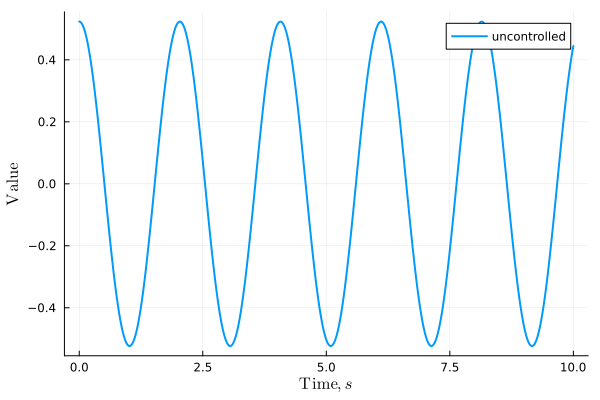

In [6]:
plot(T, X_init[3,:], color=:auto,linestyle=:solid,label="uncontrolled",linewidth=2)
plot!(xlabel=L"\textrm{Time}, s",ylabel=L"\textrm{Value}",legend=:best)

## Define MPPI problem

In [7]:
println("MPPIProblem(dt, tN, hN, K, λ, σ^2, ν, ρ, threads)")
problem = MPPIProblem(model, model.dt, model.tN, model.hN)

MPPIProblem(dt, tN, hN, K, λ, σ^2, ν, ρ, threads)


MPPIProblem(0.02, 500, 100, 1000, 100.0, 1.0, 100.0, nothing, 10)

## Solve the optimal control problem

In [8]:
X, U = solve_mppi_cpu(model, problem)

([0.0 2.4543849158890578e-5 … 0.10787390624774487 0.1109337132403125; 0.0 0.0024543911415458373 … 0.14961488624868968 0.15636581890072065; 0.5235987755982988 0.522596801822675 … 3.1497031240680315 3.1497212185299777; 0.0 -0.1001691965984137 … -0.0032654862207931006 0.00507552820670981], [0.08054715358902066 0.1836101509812501 … 0.3367517292549949 0.0])

## Plot retults

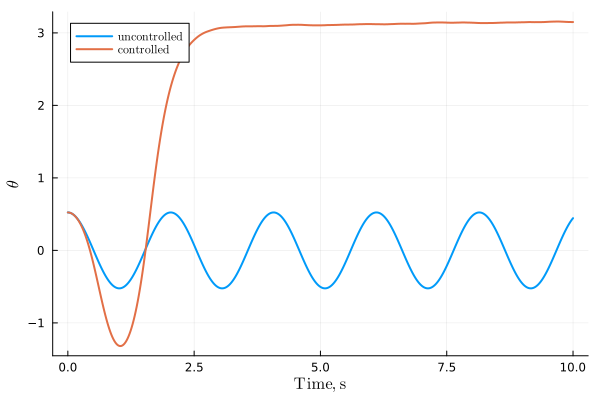

In [9]:
plot(T, X_init[3,:], color=:auto,linestyle=:solid,label=L"\textrm{uncontrolled}",linewidth=2)
plot!(T, X[3,:], color=:auto,linestyle=:solid,label=L"\textrm{controlled}",linewidth=2)
# plot!(T,X[1,:], color=:auto,linestyle=:solid,label=L"p~ \textrm{controlled}",linewidth=2)
plot!(xlabel=L"\textrm{Time, s}",ylabel=L"\theta",legend=:best)

In [62]:
@btime solve_mppi_cpu(model, problem)

  11.015 s (217925783 allocations: 12.66 GiB)


([0.0 -0.00019404992566786762 … 0.0006958521786082352 -0.00012705147238113994; 0.0 -0.019405038521359753 … -0.052411825575674406 -0.02987858274909145; 0.5235987755982988 0.5227860711511862 … 3.1408391859703335 3.1407072353849794; 0.0 -0.08124606387018232 … -0.017782283608441318 0.00458286039868647], [-1.0151515151515151 1.552755479234769 … 1.126746194183918 0.0])